In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
from itertools import combinations
from collections import Counter

In [57]:
Cust = pd.read_csv(r'E:\Classes\Python\New folder\Python Foundation End to End Case Study E-Commerce Analytics Project\5. Python Foundation End to End Case Study_E-Commerce Analytics Project\CUSTOMERS.csv')
Geo = pd.read_csv(r'E:\Classes\Python\New folder\Python Foundation End to End Case Study E-Commerce Analytics Project\5. Python Foundation End to End Case Study_E-Commerce Analytics Project\GEO_LOCATION.csv')
Order_Item = pd.read_csv(r'E:\Classes\Python\New folder\Python Foundation End to End Case Study E-Commerce Analytics Project\5. Python Foundation End to End Case Study_E-Commerce Analytics Project\ORDER_ITEMS.csv')
Order_pay = pd.read_csv(r'E:\Classes\Python\New folder\Python Foundation End to End Case Study E-Commerce Analytics Project\5. Python Foundation End to End Case Study_E-Commerce Analytics Project\ORDER_PAYMENTS.csv')
Order_Review =pd.read_csv(r'E:\Classes\Python\New folder\Python Foundation End to End Case Study E-Commerce Analytics Project\5. Python Foundation End to End Case Study_E-Commerce Analytics Project\ORDER_REVIEW_RATINGS.csv')
Orders = pd.read_csv(r'E:\Classes\Python\New folder\Python Foundation End to End Case Study E-Commerce Analytics Project\5. Python Foundation End to End Case Study_E-Commerce Analytics Project\ORDERS.csv')
Products =pd.read_csv(r'E:\Classes\Python\New folder\Python Foundation End to End Case Study E-Commerce Analytics Project\5. Python Foundation End to End Case Study_E-Commerce Analytics Project\PRODUCTS.csv')
Sells = pd.read_csv(r'E:\Classes\Python\New folder\Python Foundation End to End Case Study E-Commerce Analytics Project\5. Python Foundation End to End Case Study_E-Commerce Analytics Project\SELLERS.csv')


In [58]:
E_Comm = pd.merge(Cust, Geo, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='inner')
E_Comm1 = Order_Item.merge(Order_pay, on='order_id', how='left')
E_Comm1 = E_Comm1.merge(Sells, on='seller_id', how='left')
E_Comm1 = E_Comm1.merge(Products, on='product_id', how='left')
E_Comm1 = E_Comm1.merge(Orders, on='order_id', how='left')
E_Comm1 = E_Comm1.merge(Order_Review, on='order_id', how='left')
E_Comm = pd.merge(E_Comm, E_Comm1, on='customer_id', how='left')

In [59]:
print(E_Comm.columns)


Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'geolocation_zip_code_prefix',
       'geolocation_lat', 'geolocation_lng', 'geolocation_city',
       'geolocation_state', 'order_id', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'review_creation_date', 'review_answer_timestamp'],
      dtype='object')


In [60]:
E_Comm.drop(['geolocation_city', 'geolocation_state'],axis = 1, inplace=True)

In [61]:
E_Comm.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,order_id,order_item_id,...,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,14409,-20.509898,-47.397866,00e7ee1b050b8499577073aeb2a297a1,1.0,...,delivered,5/16/2017 15:05,5/16/2017 15:22,5/23/2017 10:47,5/25/2017 10:35,6/5/2017 0:00,88b8b52d46df026a9d1ad2136a59b30b,4.0,5/26/2017 0:00,5/30/2017 22:34
1,5dca924cc99eea2dc5ba40d11ec5dd0f,2761fee7f378f0a8d7682d8a3fa07ab1,14409,Adilabad,Andhra Pradesh,14409,-20.509898,-47.397866,95261f608a64bbbe760a212b4d48a4ee,1.0,...,delivered,6/15/2018 20:07,6/15/2018 20:41,6/18/2018 15:52,6/21/2018 12:18,7/5/2018 0:00,16a27e5ffd29a7cdf0e4984b0cab46b7,5.0,6/22/2018 0:00,6/26/2018 19:17
2,661897d4968f1b59bfff74c7eb2eb4fc,d06a495406b79cb8203ea21cc0942f8c,14409,Adilabad,Andhra Pradesh,14409,-20.509898,-47.397866,9444fa2ab50a3f5af63b48be297eda24,1.0,...,delivered,9/9/2017 15:40,9/9/2017 15:50,9/11/2017 13:43,9/18/2017 20:21,10/2/2017 0:00,23be511c12a57fe4052555f9c8905d8b,5.0,9/19/2017 0:00,9/20/2017 3:47
3,702b62324327ccba20f1be3465426437,8b3d988f330c1d1c3332ccd440c147b7,14409,Adilabad,Andhra Pradesh,14409,-20.509898,-47.397866,dceb8e88274c6f42a88a76ed979eb817,1.0,...,delivered,3/26/2018 12:04,3/26/2018 12:15,3/27/2018 0:54,3/28/2018 19:27,4/12/2018 0:00,e0fd752f37c8c6866ceb53b79b0715f6,5.0,3/29/2018 0:00,4/11/2018 20:07
4,bdf997bae7ca819b0415f5174d6b4302,866755e25db620f8d7e81b351a15bb2f,14409,Adilabad,Andhra Pradesh,14409,-20.509898,-47.397866,6ee1cea1b2edcc713f83ebfbccbc57f9,1.0,...,delivered,7/29/2018 20:39,7/29/2018 20:55,7/31/2018 12:39,8/3/2018 16:48,8/9/2018 0:00,51fb9267e6687e5ab21e4539999188ed,5.0,8/4/2018 0:00,8/4/2018 23:20


In [62]:
print(E_Comm.columns)


Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'geolocation_zip_code_prefix',
       'geolocation_lat', 'geolocation_lng', 'order_id', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'review_creation_date', 'review_answer_timestamp'],
      dtype='object')


Question 1
##A

In [63]:
# Calculate Total Revenue
total_revenue = E_Comm['price'].sum()
# Calculate Total Quantity
total_quantity = E_Comm['order_item_id'].count()
# Calculate Total Products
total_products = E_Comm['product_id'].nunique()
# Calculate Total Categories
total_categories = E_Comm['product_category_name'].nunique()
# Calculate Total Sellers
total_sellers = E_Comm['seller_id'].nunique()
# Calculate Total Locations (Customer and Seller locations combined)
total_locations = E_Comm['customer_zip_code_prefix'].nunique() + E_Comm['seller_zip_code_prefix'].nunique()
# Calculate Total Channels (Payment methods)
total_channels = E_Comm['payment_type'].nunique()
# Calculate Total Payment Methods
total_payment_methods = E_Comm['payment_sequential'].nunique()
# Print the calculated metrics
print("Total Revenue:", total_revenue)
print("Total Quantity:", total_quantity)
print("Total Products:", total_products)
print("Total Categories:", total_categories)
print("Total Sellers:", total_sellers)
print("Total Locations:", total_locations)
print("Total Channels:", total_channels)
print("Total Payment Methods:", total_payment_methods)

Total Revenue: 14235307.450000001
Total Quantity: 118001
Total Products: 32904
Total Categories: 71
Total Sellers: 3095
Total Locations: 17062
Total Channels: 4
Total Payment Methods: 29


In [64]:
##B
E_Comm['order_purchase_timestamp'] = pd.to_datetime(E_Comm['order_purchase_timestamp'])
E_Comm['order_month'] = E_Comm['order_purchase_timestamp'].dt.to_period('M')

new_customers_per_month = E_Comm.groupby('order_month')['customer_id'].nunique()


In [65]:
new_customers_per_month

order_month
2016-09       3
2016-10     308
2016-12       1
2017-01     789
2017-02    1732
2017-03    2634
2017-04    2385
2017-05    3650
2017-06    3204
2017-07    3960
2017-08    4281
2017-09    4231
2017-10    4554
2017-11    7429
2017-12    5608
2018-01    7206
2018-02    6671
2018-03    7166
2018-04    6913
2018-05    6835
2018-06    6144
2018-07    6256
2018-08    6431
2018-09       1
Freq: M, Name: customer_id, dtype: int64

In [66]:
##C
E_Comm['order_year_month'] = E_Comm['order_purchase_timestamp'].dt.to_period('M')
retention_data = E_Comm.groupby(['order_year_month', 'customer_id'])['order_id'].count().reset_index()
retention_pivot = retention_data.pivot(index='customer_id', columns='order_year_month', values='order_id')


In [67]:
retention_pivot

order_year_month,2016-09,2016-10,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,...,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09
customer_id,,,,,,,,,,,,,,,,,,,,,
00012a2ce6f8dcda20d059ce98491703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000161a058600d5901f007fab4c27140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0001fd6190edaaf884bcaf3d49edf079,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0002414f95344307404f0ace7a26f1d5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000379cdec625522490c315e70c7a9fb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcb937e9dd47a13f05ecb8290f4d3e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
fffecc9f79fd8c764f843e9951b11341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
fffeda5b6d849fbd39689bb92087f431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [68]:
##D
E_Comm['order_purchase_timestamp'] = pd.to_datetime(E_Comm['order_purchase_timestamp'])

# Calculate the order month and year
E_Comm['order_month'] = E_Comm['order_purchase_timestamp'].dt.month
E_Comm['order_year'] = E_Comm['order_purchase_timestamp'].dt.year

# Create a function to determine if a customer is new or existing
def customer_type(row):
    if row['order_month'] == row['first_order_month']:
        return 'New'
    else:
        return 'Existing'

# Calculate the first order month for each customer
first_order_df = E_Comm.groupby('customer_id')['order_year', 'order_month'].min()
first_order_df.reset_index(inplace=True)
first_order_df.rename(columns={'order_year': 'first_order_year', 'order_month': 'first_order_month'}, inplace=True)
E_Comm = E_Comm.merge(first_order_df, on='customer_id', how='left')

# Apply the customer_type function to create a new column
E_Comm['customer_type'] = E_Comm.apply(customer_type, axis=1)

# Group the data by month and customer type and calculate revenues
revenues_by_month_customer_type = E_Comm.groupby(['order_year', 'order_month', 'customer_type'])['price'].sum().reset_index()

print(revenues_by_month_customer_type)


C:\Users\Daisy\AppData\Local\Temp\ipykernel_14372\3156352099.py:16: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  first_order_df = E_Comm.groupby('customer_id')['order_year', 'order_month'].min()


    order_year  order_month customer_type       price
0       2016.0          9.0           New      267.36
1       2016.0         10.0           New    51468.91
2       2016.0         12.0           New       10.90
3       2017.0          1.0           New   129895.32
4       2017.0          2.0           New   261963.96
5       2017.0          3.0           New   397310.65
6       2017.0          4.0           New   392112.14
7       2017.0          5.0           New   547657.85
8       2017.0          6.0           New   454453.83
9       2017.0          7.0           New   534568.42
10      2017.0          8.0           New   603491.49
11      2017.0          9.0           New   661999.98
12      2017.0         10.0           New   695606.40
13      2017.0         11.0           New  1050703.83
14      2017.0         12.0           New   771809.13
15      2018.0          1.0           New   992358.21
16      2018.0          2.0           New   886596.65
17      2018.0          3.0 

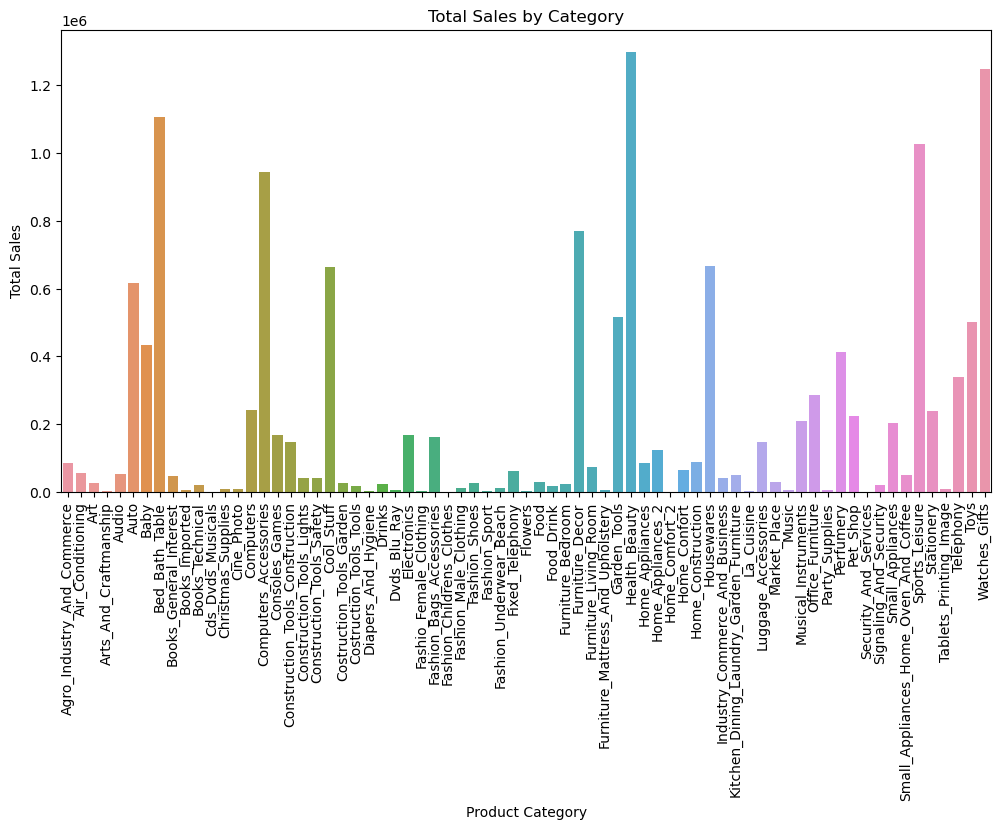

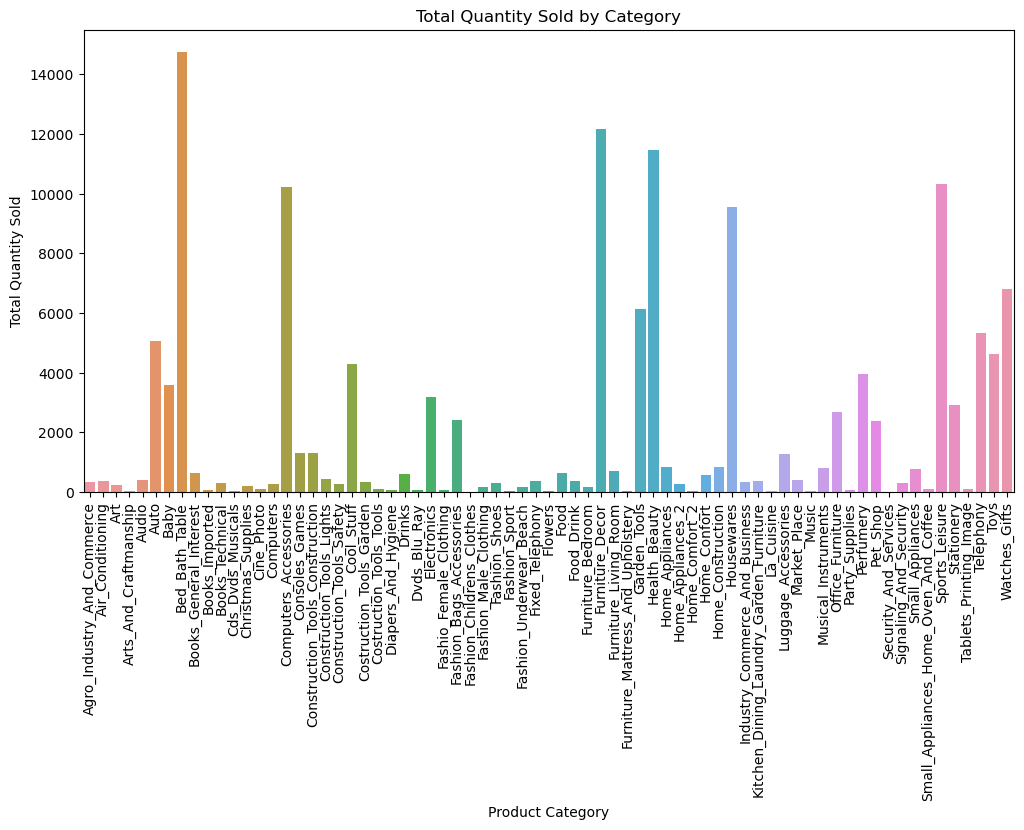

In [69]:
##E
category_sales = E_Comm.groupby('product_category_name')['price'].sum()
category_quantity = E_Comm.groupby('product_category_name')['order_item_id'].sum()

# Create a bar plot for sales by category
plt.figure(figsize=(12, 6))
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.xticks(rotation=90)
plt.title('Total Sales by Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.show()

# Create a bar plot for quantity by category
plt.figure(figsize=(12, 6))
sns.barplot(x=category_quantity.index, y=category_quantity.values)
plt.xticks(rotation=90)
plt.title('Total Quantity Sold by Category')
plt.xlabel('Product Category')
plt.ylabel('Total Quantity Sold')
plt.show()

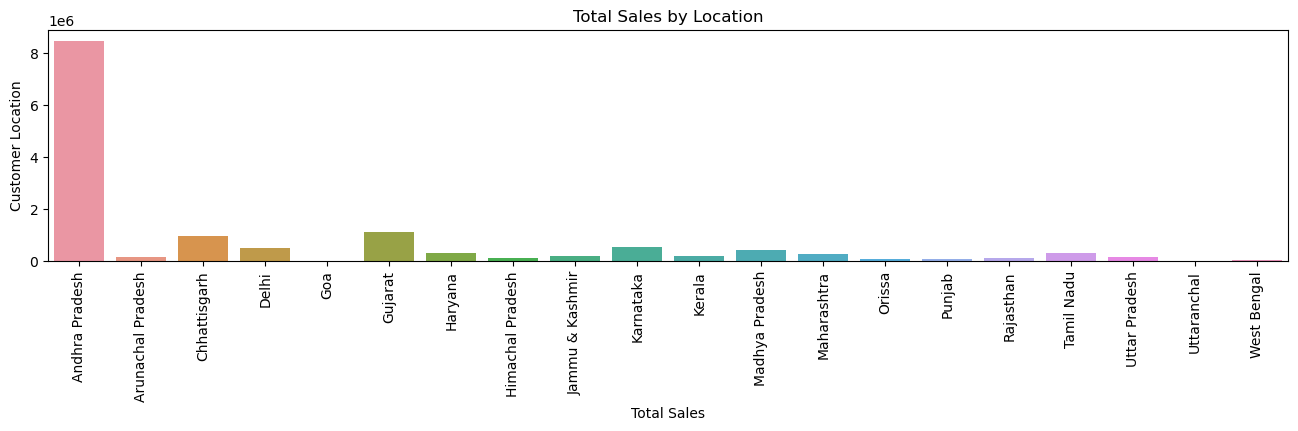

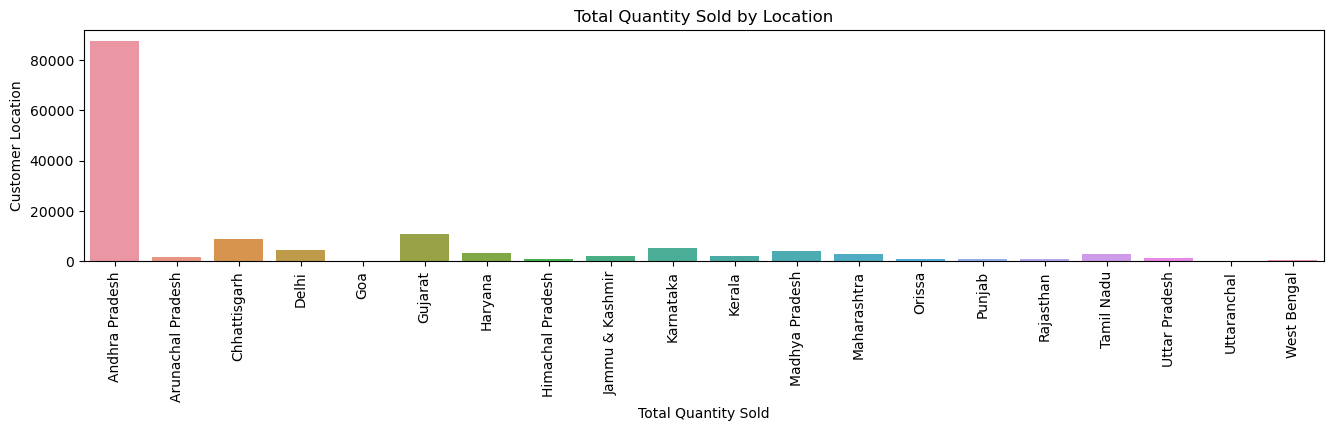

In [70]:
location_sales = E_Comm.groupby('customer_state')['price'].sum()
location_quantity = E_Comm.groupby('customer_state')['order_item_id'].sum()

# Create a bar plot for sales by location
plt.figure(figsize=(16, 3))
sns.barplot(x=location_sales.index, y=location_sales.values)
plt.xticks(rotation=90)
plt.title('Total Sales by Location')
plt.xlabel('Total Sales')
plt.ylabel('Customer Location')
plt.show()

# Create a bar plot for quantity by location
plt.figure(figsize=(16, 3))
sns.barplot(x=location_quantity.index, y=location_quantity.values)
plt.xticks(rotation=90)
plt.title('Total Quantity Sold by Location')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Customer Location')
plt.show()

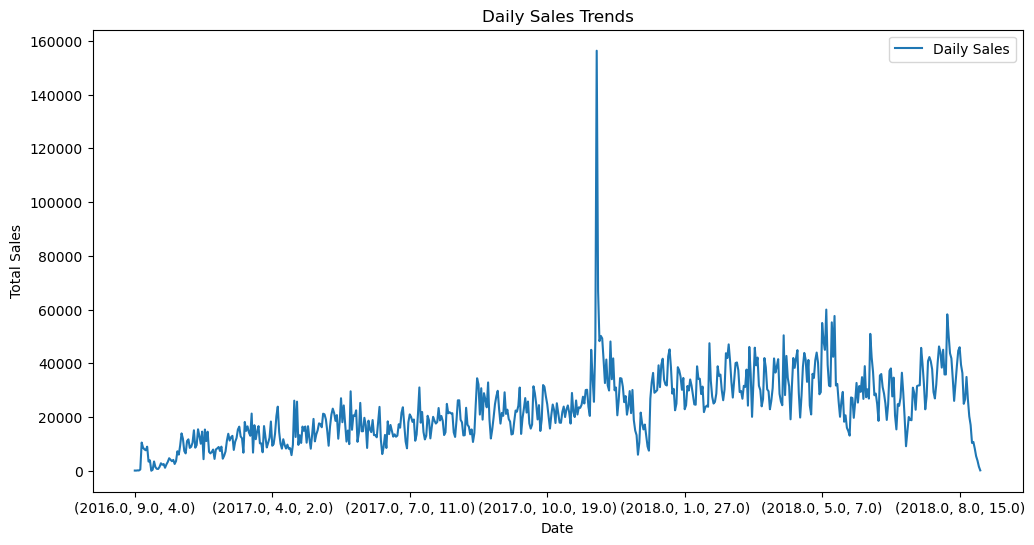

In [71]:
E_Comm['order_purchase_timestamp'] = pd.to_datetime(E_Comm['order_purchase_timestamp'])

# Extract year, month, and day from the timestamp
E_Comm['order_year'] = E_Comm['order_purchase_timestamp'].dt.year
E_Comm['order_month'] = E_Comm['order_purchase_timestamp'].dt.month
E_Comm['order_day'] = E_Comm['order_purchase_timestamp'].dt.day

# Group data by year, month, and day and calculate sum of sales
daily_sales = E_Comm.groupby(['order_year', 'order_month', 'order_day'])['price'].sum()

# Create line plot for daily sales trends
plt.figure(figsize=(12, 6))
daily_sales.plot(label='Daily Sales')
plt.title('Daily Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

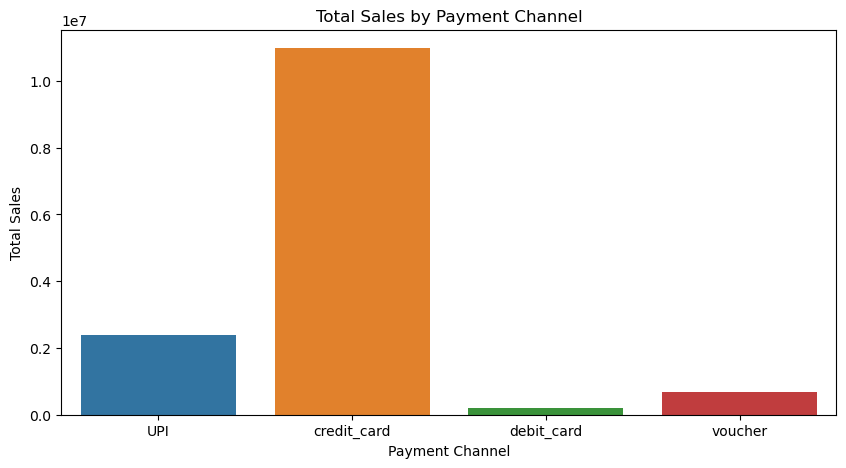

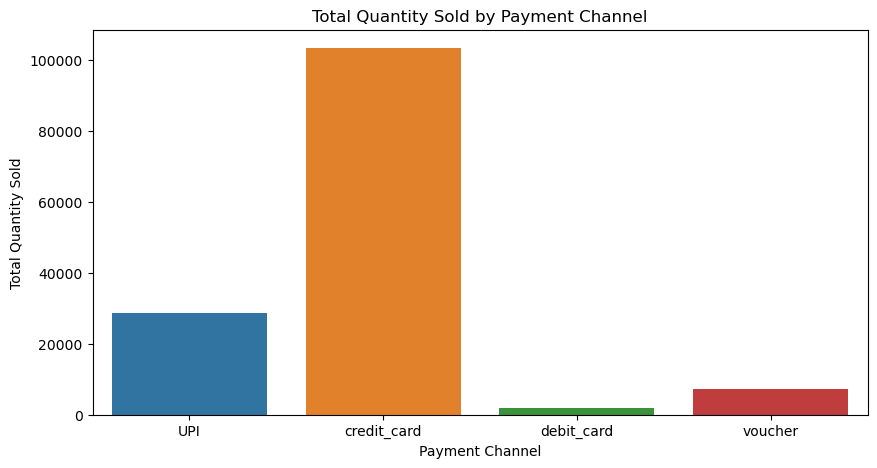

In [72]:
channel_sales = E_Comm.groupby('payment_type')['price'].sum()
channel_quantity = E_Comm.groupby('payment_type')['order_item_id'].sum()

# Create a bar plot for sales by payment channel
plt.figure(figsize=(10, 5))
sns.barplot(x=channel_sales.index, y=channel_sales.values)
plt.title('Total Sales by Payment Channel')
plt.xlabel('Payment Channel')
plt.ylabel('Total Sales')
plt.show()

# Create a bar plot for quantity by payment channel
plt.figure(figsize=(10, 5))
sns.barplot(x=channel_quantity.index, y=channel_quantity.values)
plt.title('Total Quantity Sold by Payment Channel')
plt.xlabel('Payment Channel')
plt.ylabel('Total Quantity Sold')
plt.show()

In [73]:
##F
popular_products_by_month = E_Comm.groupby(['order_year', 'order_month', 'product_id'])['order_item_id'].count().reset_index()
popular_products_by_month.rename(columns={'order_item_id': 'product_count'}, inplace=True)

# Sort by product count in descending order
popular_products_by_month.sort_values(by='product_count', ascending=False, inplace=True)
for (year, month), group in popular_products_by_month.groupby(['order_year', 'order_month']):
    print(f"Year: {year}, Month: {month}")
    print(group[['product_id', 'product_count']].head())
    print()

Year: 2016.0, Month: 9.0
                         product_id  product_count
0  5a6b04657a4c5ee34285d1e4619a96b4              3
2  f293394c72c9b5fafd7023301fc21fc2              1
3  f3c2d01a84c947b078e32bbef0718962              1
1  c1488892604e4ba5cff5b4eb4d595400              1

Year: 2016.0, Month: 10.0
                           product_id  product_count
257  eba7488e1c67729f045ab43fac426f2e             11
134  85b99d83c60cab5b4d8f927ad35212a1              7
198  bdcec8e22b04a8f4241d87bcfe9ea877              6
235  d9894482fba41f536a273ba2276d951f              6
73   473795a355d29305c3ea6b156833adf5              6

Year: 2016.0, Month: 12.0
                           product_id  product_count
278  f5d8f4fbc70ca2a0038b9a0010ed5cb0              1

Year: 2017.0, Month: 1.0
                           product_id  product_count
647  985c412b0ac92ed9d8a76bbeab6d44eb             16
413  37eb69aca8718e843d897aa7b82f462d             15
837  e5d860a0fff2e94bd1a406456cc6c4b3             13
683 

In [74]:
# Group data by seller ID and product ID, then count the occurrences
popular_products_by_seller = E_Comm.groupby(['seller_id', 'product_id'])['order_item_id'].count().reset_index()
popular_products_by_seller.rename(columns={'order_item_id': 'product_count'}, inplace=True)

# Sort by product count in descending order
popular_products_by_seller.sort_values(by='product_count', ascending=False, inplace=True)

# Display the most popular products for each seller
for seller_id, group in popular_products_by_seller.groupby('seller_id'):
    print(f"Seller ID: {seller_id}")
    print(group[['product_id', 'product_count']].head())
    print()


Seller ID: 0015a82c2db000af6aaaf3ae2ecb0532
                         product_id  product_count
0  a2ff5a97bf95719e38ea2e3b4105bce8              3

Seller ID: 001cca7ae9ae17fb1caed9dfb1094831
                          product_id  product_count
1   08574b074924071f4e201e151b152b4e            115
11  e251ebd2858be1aa7d9b2087a6992580             48
9   98a8c2fa16d7239c606640f5555768e4             30
2   0da9ffd92214425d880de3f94e74ce39             17
6   547b95702aec86f05ac37e61d164891c             17

Seller ID: 001e6ad469a905060d959994f1b41e4f
                          product_id  product_count
12  093cd981b714bcdff182b427d87fc8fc              1

Seller ID: 002100f778ceb8431b7a1020ff7ab48f
                          product_id  product_count
14  158102fe543dbaeb84d87811bfe06d0d             17
19  414c53fa9c5cc4a0390682aeb2e25ec1             14
26  79792fabf714677e94472c3ce5e719a5              3
27  9666f6aaf24141e6d17f7d56921f364d              2
20  43840498716c5a01802df8992c619267       

In [75]:
# Group data by customer state and product ID, then count the occurrences
popular_products_by_state = E_Comm.groupby(['customer_state', 'product_id'])['order_item_id'].count().reset_index()
popular_products_by_state.rename(columns={'order_item_id': 'product_count'}, inplace=True)

# Sort by product count in descending order
popular_products_by_state.sort_values(by='product_count', ascending=False, inplace=True)

# Display the most popular products for each state
for state in popular_products_by_state['customer_state'].unique():
    print(f"State: {state}")
    print(popular_products_by_state[popular_products_by_state['customer_state'] == state][['product_id', 'product_count']].head())
    print()


State: Andhra Pradesh
                             product_id  product_count
16328  aca2eb7d00ea1a7b8ebd4e68314663af            344
14576  99a4788cb24856965c36a24e339b6058            322
6370   422879e10f46682990de24d770e7f83d            301
8030   53b36df67ebb7c41585e8d54d6772e08            226
5435   389d119b48cf3043d311335e499d9c6b            226

State: Gujarat
                             product_id  product_count
36009  aca2eb7d00ea1a7b8ebd4e68314663af             52
33680  389d119b48cf3043d311335e499d9c6b             49
34238  53759a2ecddad2bb87a079a1f1519f73             45
36823  d1c427060a0f73f6b889a5c7c61f2ac4             42
33886  422879e10f46682990de24d770e7f83d             40

State: Chhattisgarh
                             product_id  product_count
26462  422879e10f46682990de24d770e7f83d             42
26241  368c6c730842d78016ad823897a372db             40
26764  53759a2ecddad2bb87a079a1f1519f73             32
28386  aca2eb7d00ea1a7b8ebd4e68314663af             31
26291 

In [76]:
# Group data by product category and product ID, then count the occurrences
popular_products_by_category = E_Comm.groupby(['product_category_name', 'product_id'])['order_item_id'].count().reset_index()
popular_products_by_category.rename(columns={'order_item_id': 'product_count'}, inplace=True)

# Sort by product count in descending order
popular_products_by_category.sort_values(by='product_count', ascending=False, inplace=True)

# Display the most popular products for each category
for category in popular_products_by_category['product_category_name'].unique():
    print(f"Category: {category}")
    print(popular_products_by_category[popular_products_by_category['product_category_name'] == category][['product_id', 'product_count']].head())
    print()


Category: Furniture_Decor
                             product_id  product_count
14134  aca2eb7d00ea1a7b8ebd4e68314663af            534
14225  b532349fe46b38fbc7bb3914c1bdae07            179
13601  78efe838c04bbc568be034082200ac20            110
13984  9ecadb84c81da840dbf3564378b586e9            106
14783  eb8c629f70275fd1c4f809116cce1efc             95

Category: Bed_Bath_Table
                            product_id  product_count
4995  99a4788cb24856965c36a24e339b6058            527
6004  f1c7f353075ce59d8a6f3cf58f419c9c            163
3219  06edb72f1e0c64b14c5b79353f7abea3            151
5940  ec2d43cc59763ec91694573b31f1c29a            132
4593  777d2e438a1b645f3aec9bd57e92672c            118

Category: Garden_Tools
                             product_id  product_count
15364  422879e10f46682990de24d770e7f83d            507
15333  389d119b48cf3043d311335e499d9c6b            405
15321  368c6c730842d78016ad823897a372db            395
15426  53759a2ecddad2bb87a079a1f1519f73           

In [77]:
##G
# Group data by customer state, month, and product category, then count the occurrences
popular_categories_by_state_month = E_Comm.groupby(['customer_state', 'order_year', 'order_month', 'product_category_name'])['order_item_id'].count().reset_index()
popular_categories_by_state_month.rename(columns={'order_item_id': 'category_count'}, inplace=True)

# Sort by category count in descending order
popular_categories_by_state_month.sort_values(by='category_count', ascending=False, inplace=True)

# Display the most popular categories for each state and month
for state in popular_categories_by_state_month['customer_state'].unique():
    print(f"State: {state}")
    state_data = popular_categories_by_state_month[popular_categories_by_state_month['customer_state'] == state]
    for year, month in state_data.groupby(['order_year', 'order_month']):
        print(f"Year: {year}, Month: {month}")
        print(month[['product_category_name', 'category_count']].head())
        print()


State: Andhra Pradesh
Year: (2016.0, 9.0), Month:    customer_state  order_year  order_month product_category_name  \
0  Andhra Pradesh      2016.0          9.0         Health_Beauty   
1  Andhra Pradesh      2016.0          9.0             Telephony   

   category_count  
0               3  
1               1  
  product_category_name  category_count
0         Health_Beauty               3
1             Telephony               1

Year: (2016.0, 10.0), Month:     customer_state  order_year  order_month           product_category_name  \
16  Andhra Pradesh      2016.0         10.0                 Furniture_Decor   
23  Andhra Pradesh      2016.0         10.0                       Perfumery   
18  Andhra Pradesh      2016.0         10.0                   Health_Beauty   
27  Andhra Pradesh      2016.0         10.0                            Toys   
8   Andhra Pradesh      2016.0         10.0           Computers_Accessories   
21  Andhra Pradesh      2016.0         10.0                  

In [78]:
##H
# Group data by product ID and calculate the maximum price for each product
max_prices_by_product = E_Comm.groupby('product_id')['price'].max().reset_index()

# Sort products by price in descending order and get the top 10
top_expensive_products = max_prices_by_product.sort_values(by='price', ascending=False).head(10)

# Merge with the original data to get product names (assuming the product names are in the dataset)
top_expensive_products = top_expensive_products.merge(E_Comm[['product_id', 'product_category_name', 'product_name_lenght', 'product_description_lenght']], on='product_id', how='left')

# Display the top 10 most expensive products
print(top_expensive_products)


                          product_id    price product_category_name  \
0   489ae2aa008f021502940f251d4cce7f  6735.00            Housewares   
1   69c590f7ffc7bf8db97190b6cb6ed62e  6729.00             Computers   
2   1bdf5e6731585cf01aa8169c7028d6ad  6499.00                   Art   
3   a6492cc69376c469ab6f61d8f44de961  4799.00      Small_Appliances   
4   c3ed642d592594bb648ff4a04cee2747  4690.00      Small_Appliances   
5   259037a6a41845e455183f89c5035f18  4590.00             Computers   
6   a1beef8f3992dbd4cd8726796aa69c53  4399.87   Musical_Instruments   
7   6cdf8fc1d741c76586d8b6b15e9eef30  4099.99        Consoles_Games   
8   dd113cb02b2af9c8e5787e8f1f0722f6  4059.00        Sports_Leisure   
9   dd113cb02b2af9c8e5787e8f1f0722f6  4059.00        Sports_Leisure   
10  6902c1962dd19d540807d0ab8fade5c6  3999.90         Watches_Gifts   

    product_name_lenght  product_description_lenght  
0                  31.0                       875.0  
1                  50.0                

# 2. Performing Customers/sellers Segmentation
a. Divide the customers into groups based on the revenue generated

In [79]:
revenue_buckets = pd.qcut(E_Comm.groupby('customer_id')['price'].sum(), q=3, labels=['Low', 'Medium', 'High'])

# Add the revenue buckets to the original data
E_Comm['revenue_bucket'] = E_Comm['customer_id'].map(revenue_buckets)

# Display the result
print(E_Comm[['customer_id', 'price', 'revenue_bucket']].head(10))

                        customer_id   price revenue_bucket
0  06b8999e2fba1a1fbc88172c00ba8bc7  124.99         Medium
1  5dca924cc99eea2dc5ba40d11ec5dd0f   79.90         Medium
2  661897d4968f1b59bfff74c7eb2eb4fc   44.90            Low
3  702b62324327ccba20f1be3465426437   19.90            Low
4  bdf997bae7ca819b0415f5174d6b4302   63.90         Medium
5  48a9965057e1c75ed3a4d511714be18b  286.40           High
6  96fbbe8005e67d382b0fc453a288be02  299.90           High
7  7d58157ef9ab184d29d36f009c7ad786  820.05           High
8  d3c09791fc7ede919353f0488a3375a6   69.00         Medium
9  29e139325c0dac2e5a95c165699b68c3   69.90         Medium


b. Divide the sellers into groups based on the revenue generated

In [80]:
seller_revenue = E_Comm.groupby('seller_id')['price'].sum()
seller_buckets = pd.qcut(seller_revenue, q=3, labels=['Low', 'Medium', 'High'])

# Create a mapping of seller IDs to their revenue buckets
seller_bucket_mapping = dict(zip(seller_revenue.index, seller_buckets))

# Add the revenue buckets to the original data
E_Comm['seller_revenue_bucket'] = E_Comm['seller_id'].map(seller_bucket_mapping)

# Display the result
print(E_Comm[['seller_id', 'price', 'seller_revenue_bucket']].head(10))

                          seller_id   price seller_revenue_bucket
0  7c67e1448b00f6e969d365cea6b010ab  124.99                  High
1  4a3ca9315b744ce9f8e9374361493884   79.90                  High
2  a3a38f4affed601eb87a97788c949667   44.90                  High
3  39d54ff918774174706fb065d7f9dc07   19.90                Medium
4  bd0a1b0aadca9a83d9304f7e8ff5fbd5   63.90                   Low
5  4a3ca9315b744ce9f8e9374361493884  286.40                  High
6  e5a38146df062edaf55c38afa99e42dc  299.90                  High
7  966cb4760537b1404caedd472cc610a5  820.05                  High
8  f3b80352b986ab4d1057a4b724be19d0   69.00                  High
9  7ade73f1b9b4e965f9009a4c3a7e2c15   69.90                  High


3.Cross-Selling (Which products are selling together)
Hint: We need to find which of the top 10 combinations of products are selling together in
each transaction. (combination of 2 or 3 buying together)

In [82]:
from itertools import combinations
from collections import Counter

In [83]:
order_products = E_Comm.groupby('order_id')['product_id'].apply(list).reset_index()

# Initialize a Counter to count combinations
combination_counter = Counter()

# Generate combinations of 2 or 3 products for each order
for products_list in order_products['product_id']:
    for r in range(2, 4):  # Generate combinations of size 2 and 3
        product_combinations = combinations(products_list, r)
        combination_counter.update(product_combinations)

# Get the top 10 combinations
top_combinations = combination_counter.most_common(10)

# Display the top combinations
for combination, count in top_combinations:
    print("Combination:", combination, "Count:", count)

Combination: ('ebf9bc6cd600eadd681384e3116fda85', 'ebf9bc6cd600eadd681384e3116fda85', '5ddab10d5e0a23acb99acf56b62b3276') Count: 18081
Combination: ('ebf9bc6cd600eadd681384e3116fda85', 'ebf9bc6cd600eadd681384e3116fda85', 'ebf9bc6cd600eadd681384e3116fda85') Count: 11480
Combination: ('ebf9bc6cd600eadd681384e3116fda85', '5ddab10d5e0a23acb99acf56b62b3276', '5ddab10d5e0a23acb99acf56b62b3276') Count: 8820
Combination: ('0554911df28fda9fd668ce5ba5949695', '0554911df28fda9fd668ce5ba5949695', '0554911df28fda9fd668ce5ba5949695') Count: 8436
Combination: ('1aecdb5fa3add74e385f25c6c527a462', '1aecdb5fa3add74e385f25c6c527a462', '1aecdb5fa3add74e385f25c6c527a462') Count: 3654
Combination: ('8d37ee446981d3790967d0268d6cfc81', '8d37ee446981d3790967d0268d6cfc81', '8d37ee446981d3790967d0268d6cfc81') Count: 2600
Combination: ('11250b0d4b709fee92441c5f34122aed', '11250b0d4b709fee92441c5f34122aed', '11250b0d4b709fee92441c5f34122aed') Count: 2024
Combination: ('eea3e07f864a0a1389726d8a5f31c3f6', 'eea3e07f8

4. Payment Behaviour
a. How customers are paying?

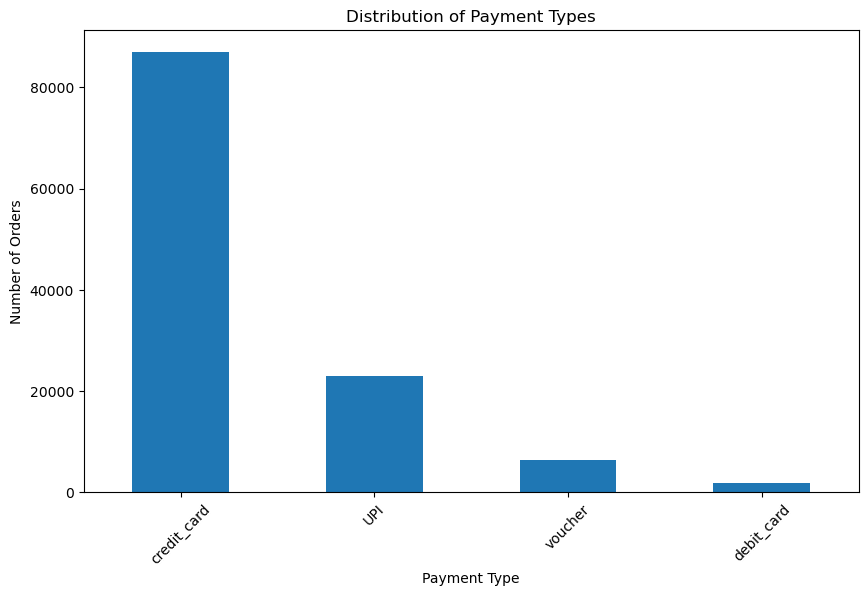

In [84]:
payment_distribution = E_Comm['payment_type'].value_counts()

# Visualize the distribution using a bar plot
plt.figure(figsize=(10, 6))
payment_distribution.plot(kind='bar')
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

b. Which payment channels are used by most customers?

Payment Channels and Their Usage Count:
credit_card    87026
UPI            22957
voucher         6317
debit_card      1698
Name: payment_type, dtype: int64


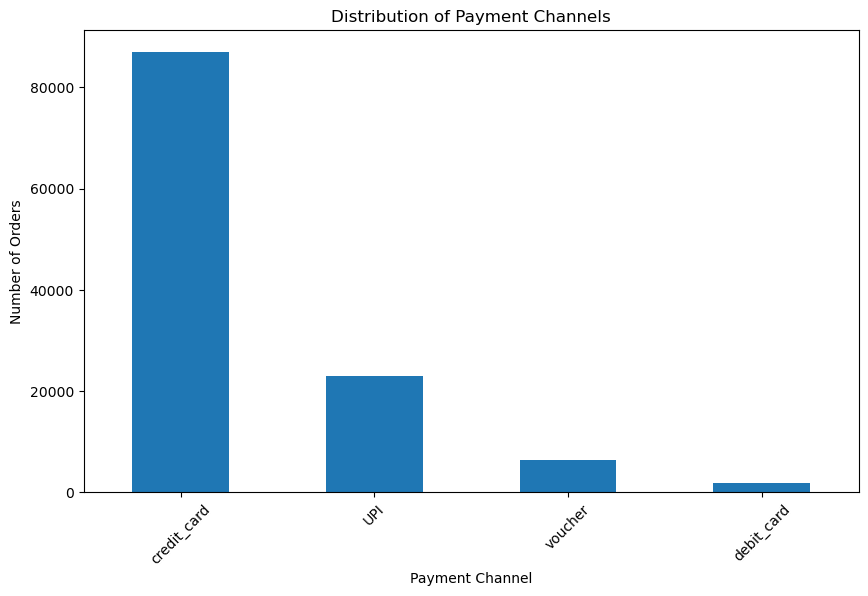

In [85]:
payment_distribution = E_Comm['payment_type'].value_counts()

# Display the top payment channels and their usage count
print("Payment Channels and Their Usage Count:")
print(payment_distribution)

# Visualize the distribution using a bar plot
plt.figure(figsize=(10, 6))
payment_distribution.plot(kind='bar')
plt.title('Distribution of Payment Channels')
plt.xlabel('Payment Channel')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

5. Customer satisfaction towards category & product
a. Which categories (top 10) are maximum rated & minimum rated?

In [86]:
category_avg_rating = E_Comm.groupby('product_category_name')['review_score'].mean()

# Get the top 10 categories with the highest average review scores
top_10_categories = category_avg_rating.nlargest(10)

# Get the bottom 10 categories with the lowest average review scores
bottom_10_categories = category_avg_rating.nsmallest(10)

# Display the results
print("Top 10 Categories with Highest Average Review Scores:")
print(top_10_categories)

print("\nBottom 10 Categories with Lowest Average Review Scores:")
print(bottom_10_categories)

Top 10 Categories with Highest Average Review Scores:
product_category_name
Cds_Dvds_Musicals                        4.642857
Fashion_Childrens_Clothes                4.500000
Books_General_Interest                   4.430851
Books_Imported                           4.419355
Books_Technical                          4.345588
Costruction_Tools_Tools                  4.333333
Small_Appliances_Home_Oven_And_Coffee    4.320513
Food_Drink                               4.312715
Luggage_Accessories                      4.289905
Cine_Photo                               4.216216
Name: review_score, dtype: float64

Bottom 10 Categories with Lowest Average Review Scores:
product_category_name
Security_And_Services                2.500000
Diapers_And_Hygiene                  3.256410
Home_Comfort_2                       3.387097
Office_Furniture                     3.516274
Fashion_Male_Clothing                3.531034
Fixed_Telephony                      3.660517
Fashio_Female_Clothing            

b. Which products (top10) are maximum rated & minimum rated?

In [87]:
product_avg_rating = E_Comm.groupby('product_id')['review_score'].mean()

# Get the top 10 products with the highest average review scores
top_10_products = product_avg_rating.nlargest(10)

# Get the bottom 10 products with the lowest average review scores
bottom_10_products = product_avg_rating.nsmallest(10)

# Display the results
print("Top 10 Products with Highest Average Review Scores:")
print(top_10_products)

print("\nBottom 10 Products with Lowest Average Review Scores:")
print(bottom_10_products)

Top 10 Products with Highest Average Review Scores:
product_id
00066f42aeeb9f3007548bb9d3f33c38    5.0
000b8f95fcb9e0096488278317764d19    5.0
000d9be29b5207b54e86aa1b1ac54872    5.0
00126f27c813603687e6ce486d909d01    5.0
001b237c0e9bb435f2e54071129237e9    5.0
001c5d71ac6ad696d22315953758fa04    5.0
0021a87d4997a48b6cef1665602be0f5    5.0
002959d7a0b0990fe2d69988affcbc80    5.0
002af88741ba70c7b5cf4e4a0ad7ef85    5.0
002c6dab60557c48cfd6c2222ef7fd76    5.0
Name: review_score, dtype: float64

Bottom 10 Products with Lowest Average Review Scores:
product_id
0009406fd7479715e4bef61dd91f2462    1.0
0011c512eb256aa0dbbb544d8dffcf6e    1.0
002d4ea7c04739c130bb74d7e7cd1694    1.0
0043c62d00db47eff6a6bc4cf6bfaeda    1.0
0043d1a25ef08fb6f41b8fa6f91742ab    1.0
0060b415594c5e1200324ef1a18493c4    1.0
00cf06147ed4880ec5fbba2adbb20e1d    1.0
00e62bcf9337ca4c5d5b4c5c8188f8d2    1.0
00efb9a8ce0cf3b2f37892ab003edc10    1.0
0103863bf3441460142ec23c74388e4c    1.0
Name: review_score, dtype: float64


c. Average rating by location, seller, product, category, month etc.

In [88]:
avg_rating_by_location = E_Comm.groupby('customer_state')['review_score'].mean()
print(avg_rating_by_location)

customer_state
Andhra Pradesh       3.995344
Arunachal Pradesh    4.023503
Chhattisgarh         4.031136
Delhi                4.028025
Goa                  4.777778
Gujarat              4.038444
Haryana              4.119375
Himachal Pradesh     3.989535
Jammu & Kashmir      3.998359
Karnataka            4.015584
Kerala               4.051181
Madhya Pradesh       3.996139
Maharashtra          4.091890
Orissa               4.084770
Punjab               4.163636
Rajasthan            4.098592
Tamil Nadu           4.111202
Uttar Pradesh        4.129614
Uttaranchal          3.669811
West Bengal          3.985714
Name: review_score, dtype: float64


In [89]:
# Group by 'seller_id' and calculate the average review score
avg_rating_by_seller = E_Comm.groupby('seller_id')['review_score'].mean()
print(avg_rating_by_seller)


seller_id
0015a82c2db000af6aaaf3ae2ecb0532    3.666667
001cca7ae9ae17fb1caed9dfb1094831    3.883817
001e6ad469a905060d959994f1b41e4f    1.000000
002100f778ceb8431b7a1020ff7ab48f    4.033898
003554e2dce176b5555353e4f3555ac8    5.000000
                                      ...   
ffcfefa19b08742c5d315f2791395ee5    1.000000
ffdd9f82b9a447f6f8d4b91554cc7dd3    4.285714
ffeee66ac5d5a62fe688b9d26f83f534    4.214286
fffd5413c0700ac820c7069d66d98c89    3.838710
ffff564a4f9085cd26170f4732393726    2.100000
Name: review_score, Length: 3095, dtype: float64


In [91]:
# Group by 'product_id' and calculate the average review score
avg_rating_by_product = E_Comm.groupby('product_id')['review_score'].mean()
print(avg_rating_by_product)



product_id
00066f42aeeb9f3007548bb9d3f33c38    5.0
00088930e925c41fd95ebfe695fd2655    4.0
0009406fd7479715e4bef61dd91f2462    1.0
000b8f95fcb9e0096488278317764d19    5.0
000d9be29b5207b54e86aa1b1ac54872    5.0
                                   ... 
fff6177642830a9a94a0f2cba5e476d1    4.5
fff81cc3158d2725c0655ab9ba0f712c    4.0
fff9553ac224cec9d15d49f5a263411f    5.0
fffdb2d0ec8d6a61f0a0a0db3f25b441    5.0
fffe9eeff12fcbd74a2f2b007dde0c58    4.0
Name: review_score, Length: 32904, dtype: float64


In [92]:
# Group by 'product_category_name' and calculate the average review score
avg_rating_by_category = E_Comm.groupby('product_category_name')['review_score'].mean()
print(avg_rating_by_category)


product_category_name
Agro_Industry_And_Commerce    4.150794
Air_Conditioning              3.920530
Art                           3.917808
Arts_And_Craftmanship         4.125000
Audio                         3.823684
                                ...   
Stationery                    4.175325
Tablets_Printing_Image        4.045977
Telephony                     3.935456
Toys                          4.143359
Watches_Gifts                 4.000646
Name: review_score, Length: 71, dtype: float64


In [93]:
# Convert 'order_purchase_timestamp' to datetime and extract month
E_Comm['order_purchase_timestamp'] = pd.to_datetime(E_Comm['order_purchase_timestamp'])
E_Comm['purchase_month'] = E_Comm['order_purchase_timestamp'].dt.month

# Group by 'purchase_month' and calculate the average review score
avg_rating_by_month = E_Comm.groupby('purchase_month')['review_score'].mean()
print(avg_rating_by_month)


purchase_month
1.0     3.942982
2.0     3.788977
3.0     3.780309
4.0     4.036007
5.0     4.118899
6.0     4.156530
7.0     4.170133
8.0     4.205108
9.0     4.120616
10.0    4.011688
11.0    3.826552
12.0    3.927018
Name: review_score, dtype: float64
